In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

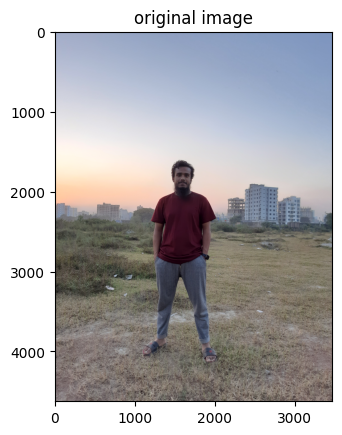

In [18]:
img = cv2.imread('image/Nirob.jpg')
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title("original image")
plt.show()

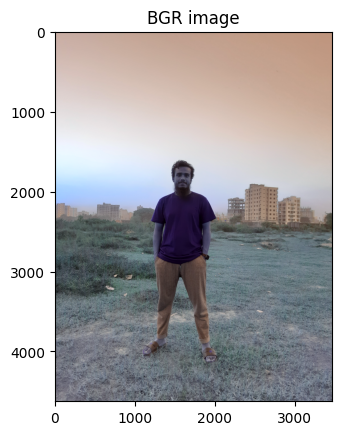

In [19]:
img = cv2.imread('image/Nirob.jpg')
plt.title("BGR image")
plt.imshow(img)

In [20]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

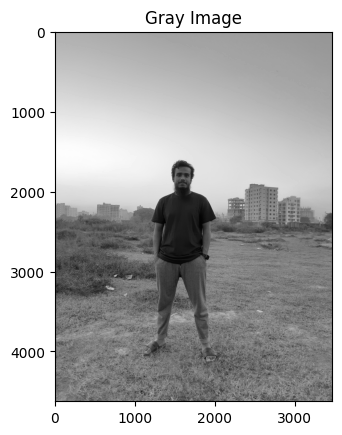

In [21]:
plt.title("Gray Image")
plt.imshow(gray, cmap='gray')

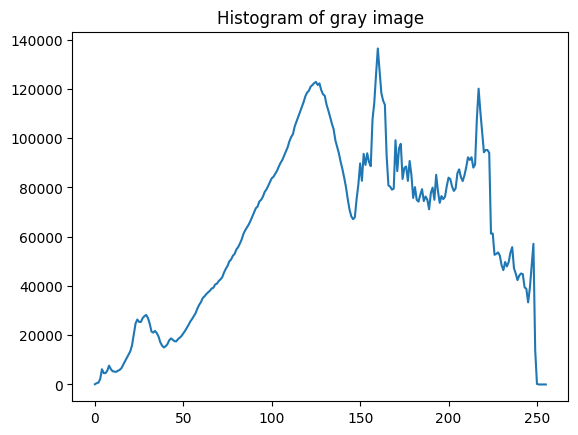

In [22]:
hist = cv2.calcHist([gray],[0],None,[256],[0,256])
plt.title("Histogram of gray image")
plt.plot(hist)

In [23]:
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(gray,kernel,iterations = 1)
dilation = cv2.dilate(gray,kernel,iterations = 1)

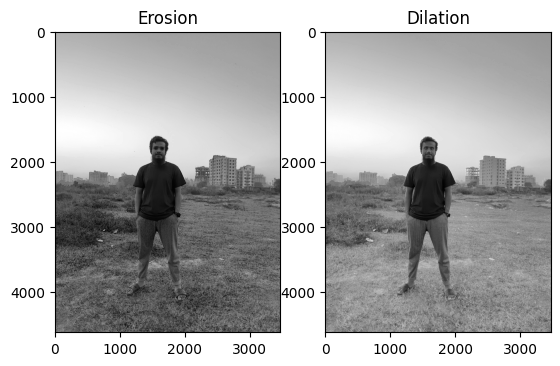

In [24]:
plt.subplot(1, 2, 1)
plt.imshow(erosion, cmap='gray')
plt.title('Erosion')

plt.subplot(1, 2, 2)
plt.imshow(dilation, cmap='gray')
plt.title('Dilation')

plt.show()

In [25]:
equ = cv2.equalizeHist(gray)

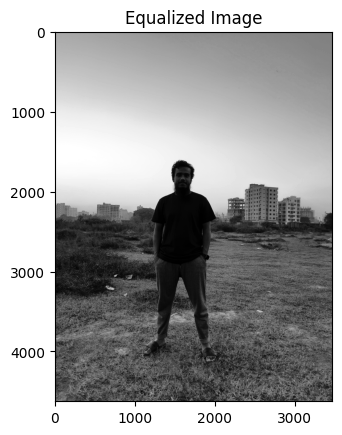

In [26]:
plt.title("Equalized Image")
plt.imshow(equ, cmap='gray')

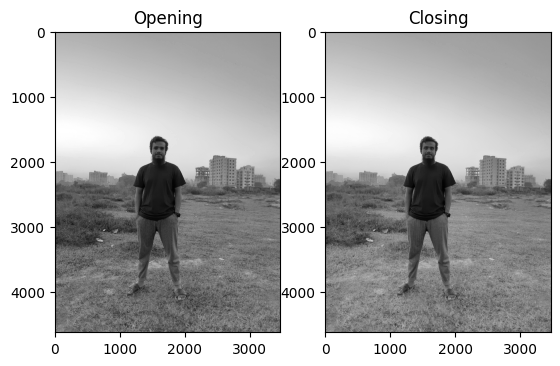

In [27]:
opening = cv2.morphologyEx(gray, cv2.MORPH_OPEN, kernel)
plt.subplot(1, 2, 1)
plt.imshow(opening, cmap='gray')
plt.title('Opening')

closing = cv2.morphologyEx(gray, cv2.MORPH_CLOSE, kernel)
plt.subplot(1, 2, 2)
plt.imshow(closing, cmap='gray')
plt.title('Closing')

plt.show()


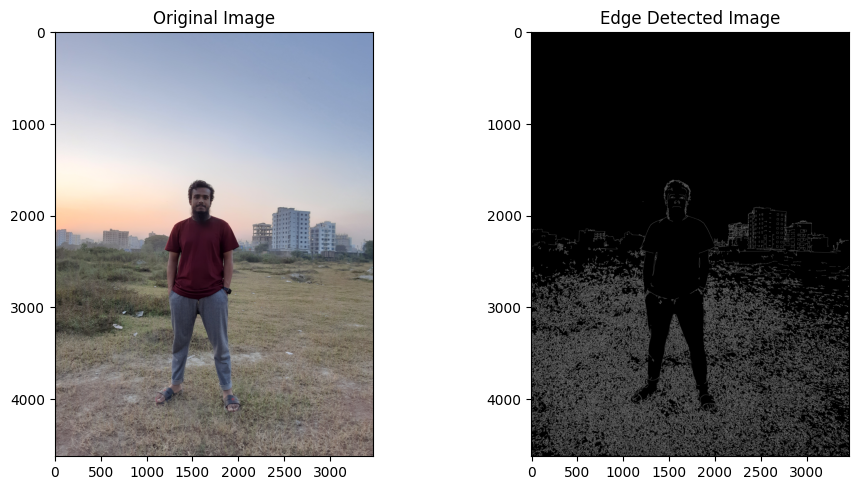

In [30]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
edges = cv2.Canny(blurred, 30, 150)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
plt.title("Edge Detected Image")
plt.imshow(edges, cmap='gray')

plt.tight_layout()
plt.show()

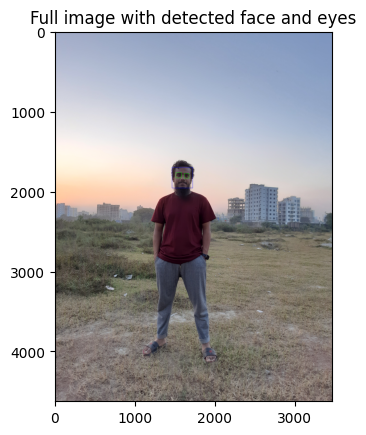

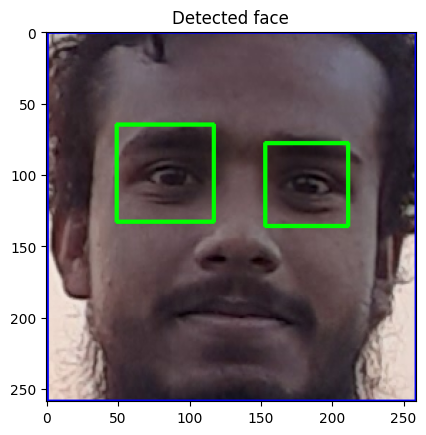

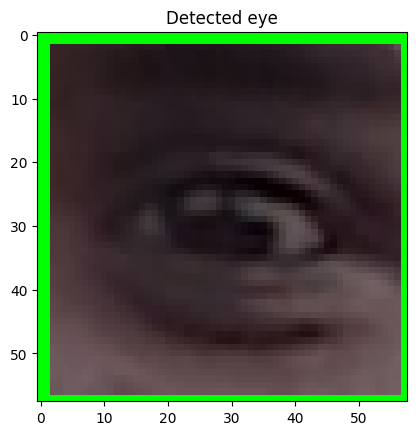

No smile detected


In [31]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
smile_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_smile.xml')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = face_cascade.detectMultiScale(gray, 1.1, 4)

for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
    
    roi_gray = gray[y:y+h, x:x+w]
    
    eyes = eye_cascade.detectMultiScale(roi_gray, 1.1, 4)
    count=0
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(img, (x+ex, y+ey), (x+ex+ew, y+ey+eh), (0, 255, 0), 2)
        count+=1
        if count==2:
            break
    break 


plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Full image with detected face and eyes')
plt.show()

face_roi = img[y:y+h, x:x+w]
plt.imshow(cv2.cvtColor(face_roi, cv2.COLOR_BGR2RGB))
plt.title('Detected face')
plt.show()

eye_roi = face_roi[ey:ey+eh, ex:ex+ew]
plt.imshow(cv2.cvtColor(eye_roi, cv2.COLOR_BGR2RGB))
plt.title('Detected eye')
plt.show()

smile = smile_cascade.detectMultiScale(roi_gray, 1.8, 20)
if len(smile) > 0:
    print("Smile detected")
else:
    print("No smile detected")